# loading libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Loading Dataset

In [2]:
df= pd.read_csv("DATA_Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [3]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#df["TotalCharges"][488]

In [5]:
#convert total charges column to numerical
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [6]:
round(df.isna().sum()/len(df),4)*100

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [7]:
round((df == 0).sum()/len(df),2)*100

gender               0.0
SeniorCitizen       84.0
Partner              0.0
Dependents           0.0
tenure               0.0
PhoneService         0.0
OnlineSecurity       0.0
OnlineBackup         0.0
DeviceProtection     0.0
TechSupport          0.0
StreamingTV          0.0
StreamingMovies      0.0
Contract             0.0
MonthlyCharges       0.0
TotalCharges         0.0
Churn                0.0
dtype: float64

In [8]:
#filling the missing value with the mean 
def fill_values():
    mean_totalcharges = np.mean(df['TotalCharges'])
    df['TotalCharges'] = df['TotalCharges'].fillna(mean_totalcharges)
    return df
fill_values()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [9]:
numericals= df._get_numeric_data()
numericals

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [10]:
#distribution of numerical data
numericals.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
categoricals=  df.select_dtypes(include=['object'])
categoricals

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


## hot encoding categorical features

In [26]:
categoricals_with_dummies = pd.get_dummies(categoricals, sparse=True, drop_first=True)
categoricals_with_dummies

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Scalling numerical features 

In [92]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(numericals)
print(scaled)

[[-0.43991649 -1.27744458 -1.16032292 -0.99497138]
 [-0.43991649  0.06632742 -0.25962894 -0.17387565]
 [-0.43991649 -1.23672422 -0.36266036 -0.96039939]
 ...
 [-0.43991649 -0.87024095 -1.1686319  -0.85518222]
 [ 2.27315869 -1.15528349  0.32033821 -0.87277729]
 [-0.43991649  1.36937906  1.35896134  2.01391739]]


In [28]:
#spliting data (train/test)
X=numericals
y=categoricals_with_dummies['Churn_Yes']

# Logistic regresion

,Error_metric,Train,Test
0,Accuracy,0.788782,0.801278
1,Precision,0.652482,0.699187
2,Recall,0.431925,0.455026


Confusion matrix for the train set
[[3800  343]
 [ 847  644]]


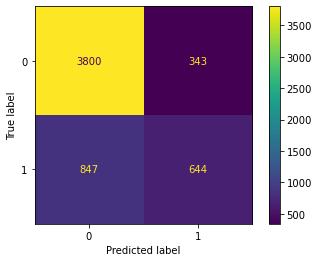



Confusion matrix for the test set
[[957  74]
 [206 172]]


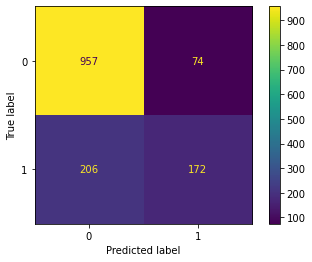

In [51]:
log = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd');
plt.show()